IMPORTAMOS LAS LIBRERIAS A UTILIZAR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ABIRMOS EL ARCHIVO

In [2]:
# Carga el archivo Excel en un DataFrame de pandas
homicidios = pd.read_csv('dataframe_combinado.csv')
homicidios.head(5)

,ID,N_VICTIMAS,FECHA,AÑO,MES,DIA,HORA,HORA_ENTERA,TIPO_DE_CALLE,CALLE,COMUNA,COORDINADA,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD
0,2016-0001,1,2016/01/01,2016,1,1,4:00:00,4,AVENIDA,PIEDRA BUENA AV.,8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,M,19
1,2016-0002,1,2016/01/02,2016,1,2,1:15:00,1,GRAL PAZ,"PAZ, GRAL. AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,M,70
2,2016-0003,1,2016/01/03,2016,1,3,7:00:00,7,AVENIDA,ENTRE RIOS AV.,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,M,30
3,2016-0004,1,2016/01/10,2016,1,10,0:00:00,0,AVENIDA,LARRAZABAL AV.,8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,M,18
4,2016-0005,1,2016/01/21,2016,1,21,5:20:00,5,AVENIDA,SAN JUAN AV.,1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,M,29


**EDA**

REALIZAREMOS UNA ANALISIS DE LOS ACCIDENTES QUE OCURRIERON, DONDE VAMOS A VER CUALES FUERON LOS MAS OCACIONADOS 

Vamos a explorar cosas como la distribución de las víctimas por género o edad, los tipos de calles más comunes donde ocurren los incidentes, tendencias a lo largo del tiempo, entre otros.

VAMOS A VER CUAL ES EL GENERO QUE CONLLEVO LA MAYOR CANTIDAD DE VICTIMA POR DISTINTO TIPO DE GENEROS

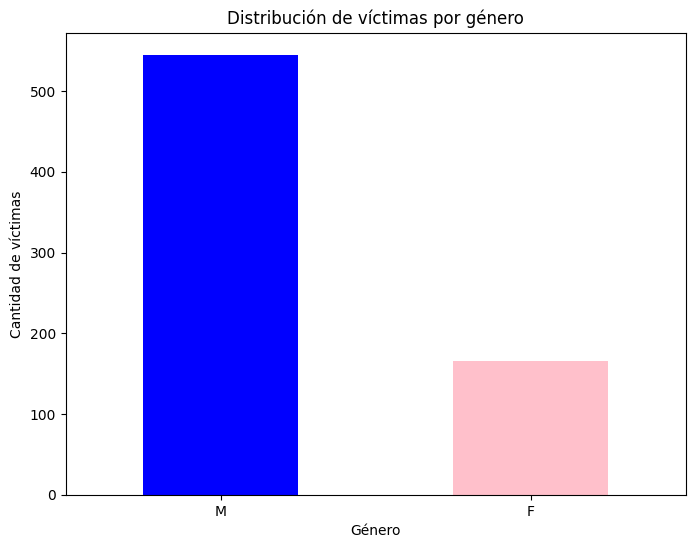

In [11]:
# Eliminar las filas con el valor "SD" en la columna 'SEXO'
victimas_por_genero_filtrado = homicidios[homicidios['SEXO'] != 'SD']['SEXO'].value_counts()

# Graficar la distribución de víctimas por género
plt.figure(figsize=(8, 6))
victimas_por_genero_filtrado.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribución de víctimas por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de víctimas')
plt.xticks(rotation=0)
plt.show()


Podemos observar que el genero que mas veces fue victima de un accidente fue el de Masculino superando las 500 victimas y el genero femenino no supera las 200 victimas en lo que fue durante todos los años. Por lo cual vamos a pasar a ver cuantas accidente fue teniendo cada sexo en diferente tipo de año

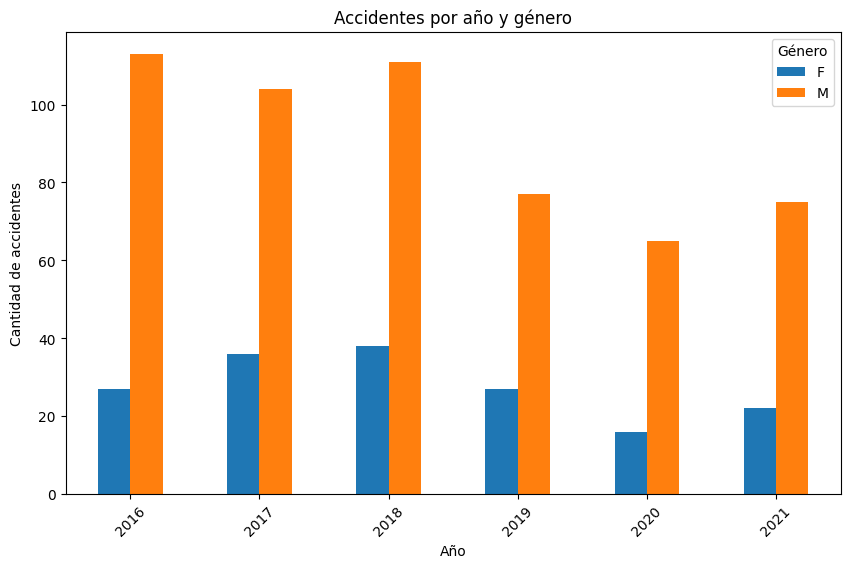

Años en los que ambos géneros tuvieron accidentes:
SEXO   F    M
AÑO          
2016  27  113
2017  36  104
2018  38  111
2019  27   77
2020  16   65
2021  22   75


In [19]:
# Filtrar los datos para eliminar las filas con el valor "SD" en la columna 'SEXO'
homicidios_filtrados = homicidios[homicidios['SEXO'] != 'SD']

# Agrupar los datos por año y género y contar el número de ocurrencias
accidentes_por_año_genero = homicidios_filtrados.groupby(['AÑO', 'SEXO']).size()

# Filtrar los grupos donde ambos géneros están presentes
accidentes_ambos_generos = accidentes_por_año_genero.unstack().dropna()

# Graficar los años en los que ambos géneros tuvieron accidentes
accidentes_ambos_generos.plot(kind='bar', figsize=(10, 6))
plt.title('Accidentes por año y género')
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()

# Mostrar los años en los que ambos géneros tuvieron accidentes
print("Años en los que ambos géneros tuvieron accidentes:")
print(accidentes_ambos_generos)

Se puede observar que los primero años de nuestros datos, fueron donde mas accidentes obtuvo el genero masculino superando las 100 victimas por año. Mientras que en los siguientes año podemos ver que disminuyeron 20 victimas por año. En el genero Femenino tuvo su maximo pico de victumas en el año 2018 llegando casi a las 40 victimas, despues en los siguientes año se mantuvo entre 30 victimas por años

Al tener estos datos podemos avanzar consultando en que calle ocurrieron mas accidentes dentro de nuestros años

VAMOS A VER CUALES FUERON LAS CALLES POR DONDE MAS ACCIDENTES OCURRIERON

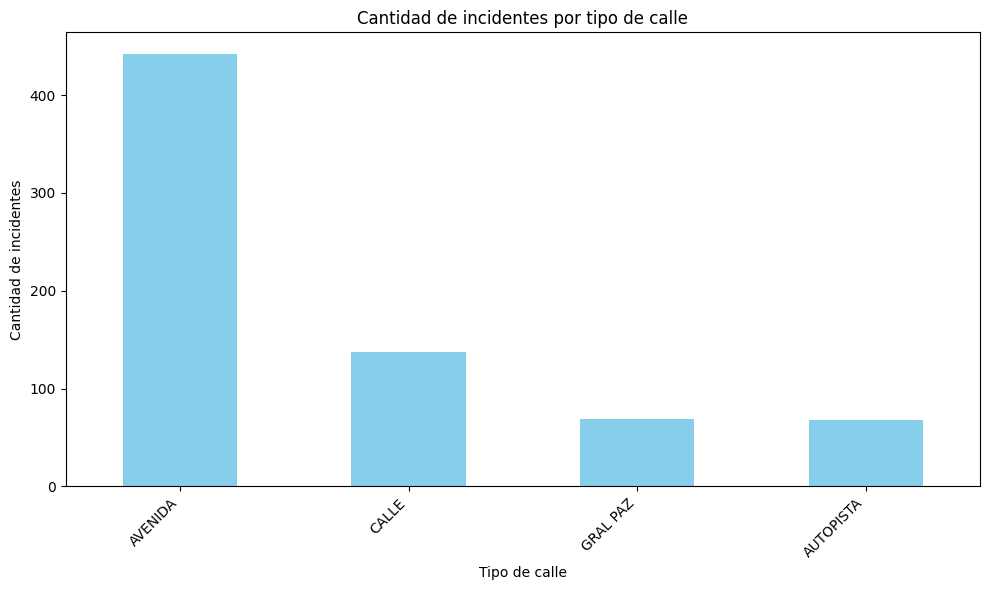

In [4]:
# Calcular la cantidad de incidentes por tipo de calle
incidentes_por_tipo_calle = homicidios['TIPO_DE_CALLE'].value_counts()

# Graficar la cantidad de incidentes por tipo de calle
plt.figure(figsize=(10, 6))
incidentes_por_tipo_calle.plot(kind='bar', color='skyblue')
plt.title('Cantidad de incidentes por tipo de calle')
plt.xlabel('Tipo de calle')
plt.ylabel('Cantidad de incidentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Se puede observar que por la avenia ocurrieron mas de 400 incidentes, por lo cual es un valor razonable ya que son Rutas mas trancitadas y concurridas. Ya que en las calles se transita de una manera mas ligera, lo cual notamos una diferencia de aproximadamente 300 incidentes. Y lo que es GRAL. PAZ y AUTOPISTA no llegan a los 100 incidentes. Por lo que podemos decir es que se manejra de una forma mas pasiva, y constante ya que no tiene tantos cruces ni mucha variacion de velocidad 

Vamos a ver que genero participo en distintas calles

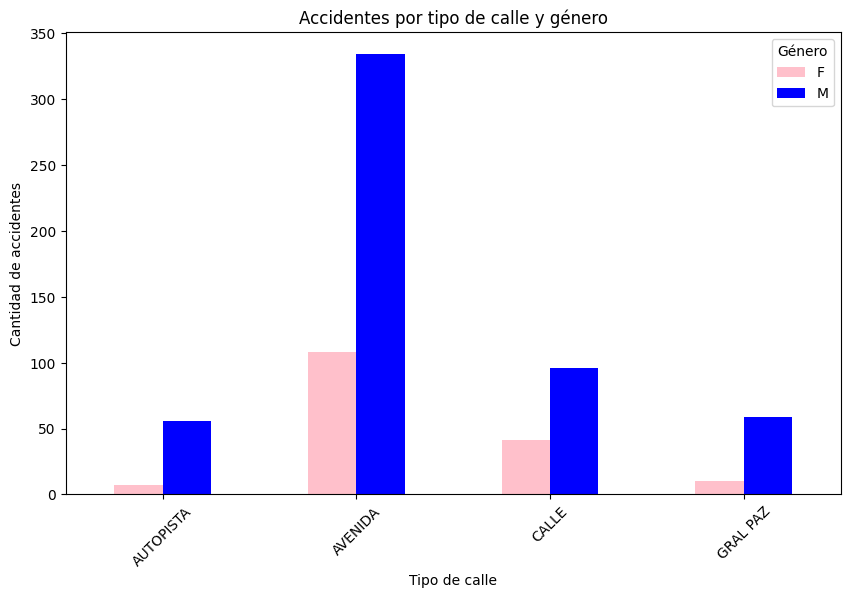

In [25]:
# Filtrar los datos para eliminar las filas con el valor "SD" en la columna 'SEXO'
homicidios_filtrados = homicidios[homicidios['SEXO'] != 'SD']

# Filtrar las columnas de interés (TIPO_CALLE y SEXO)
datos_interesantes = homicidios_filtrados[['TIPO_DE_CALLE', 'SEXO']]

# Contar la cantidad de accidentes por tipo de calle y género
accidentes_por_tipo_calle_genero = datos_interesantes.groupby(['TIPO_DE_CALLE', 'SEXO']).size().unstack()

# Graficar los resultados
accidentes_por_tipo_calle_genero.plot(kind='bar', figsize=(10, 6), color=['pink', 'blue'])
plt.title('Accidentes por tipo de calle y género')
plt.xlabel('Tipo de calle')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()




Podemos ver que en las avenidas fueron los picos altos por ambos generos donde mas incidente sucedieron

COMO TENEMOS DISTINTOS TIPOS DE DATOS VAMOS A VER CUANTOS ACCIDENTE HUBIERON POR DIFERENTES AÑOS

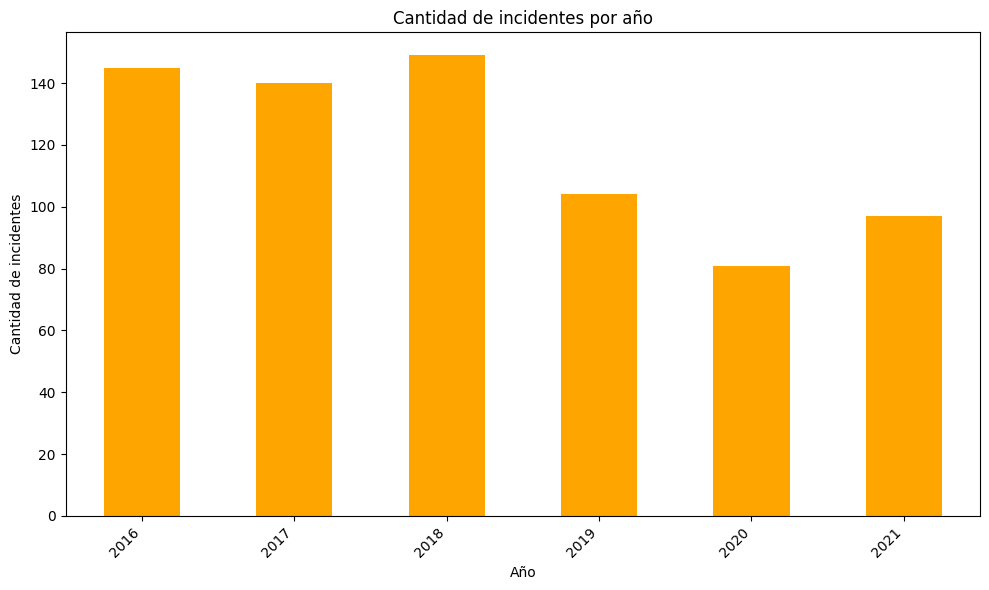

El año con la mayor cantidad de accidentes es 2018 con 149 incidentes.


In [26]:
# Calcular la cantidad de incidentes por año y ordenar los resultados
incidentes_por_año = homicidios['AÑO'].value_counts().sort_index()

# Graficar la cantidad de incidentes por año
plt.figure(figsize=(10, 6))
incidentes_por_año.plot(kind='bar', color='orange')
plt.title('Cantidad de incidentes por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de incidentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identificar el año con la mayor cantidad de incidentes
año_mas_accidentes = incidentes_por_año.idxmax()
cantidad_maxima_año = incidentes_por_año.max()
print(f"El año con la mayor cantidad de accidentes es {año_mas_accidentes} con {cantidad_maxima_año} incidentes.")



En el año 2018 supero a todos los años con un total de 149 accidentes, por lo que en los siguientes años hubo unas mejoras de Transitos y comenzo a reducir los accidentes. El año mas bajo fue el 2020 y lo podemos asimilar a la poca conduccion que se realizo ese año debido a la pandemia

LOS MESES QUE MAS ACCIDENTES OCURRIO

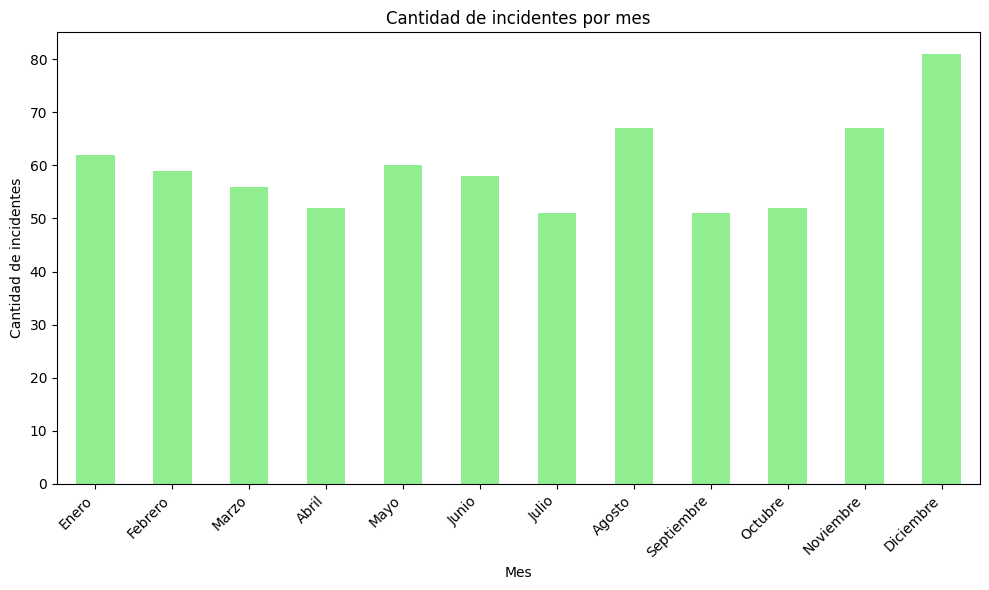

El mes con la mayor cantidad de accidentes es Diciembre con 81 incidentes.


In [6]:
# Calcular la cantidad de incidentes por mes utilizando la columna MES
incidentes_por_mes = homicidios['MES'].value_counts().sort_index()

# Obtener el nombre del mes para cada número de mes
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Graficar la cantidad de incidentes por mes
plt.figure(figsize=(10, 6))
incidentes_por_mes.plot(kind='bar', color='lightgreen')
plt.title('Cantidad de incidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de incidentes')
plt.xticks(incidentes_por_mes.index - 1, nombres_meses, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identificar el mes con la mayor cantidad de incidentes
mes_mas_accidentes = nombres_meses[incidentes_por_mes.idxmax() - 1]
cantidad_maxima = incidentes_por_mes.max()
print(f"El mes con la mayor cantidad de accidentes es {mes_mas_accidentes} con {cantidad_maxima} incidentes.")


En todos los años donde mas accidente ocurrio fueron en diciembre por lo que se podria decir que es debido al comienzo de vacaciones y donde mas gente circula. Lo cual tambien lo cual hay muchos eventos y mucha gente maneja en estado de ebriedad. Por lo que para ver eso pordemos realizar un grafico donde ocurrieron los accidentes si fueron los fin de semana o entre semana

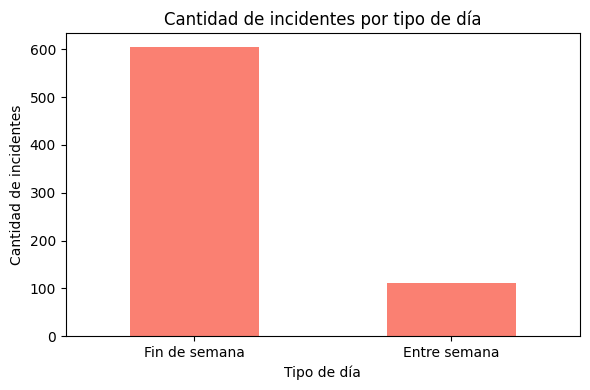

Porcentaje de incidentes ocurridos durante la semana: 15.64%
Porcentaje de incidentes ocurridos durante el fin de semana: 84.36%


In [7]:
# Función para determinar si un día es entre semana o fin de semana
def tipo_dia(dia):
    if dia < 6:  # Los días de la semana son del 0 al 5 (lunes a viernes)
        return 'Entre semana'
    else:  # Los días 6 y 7 son sábado y domingo, respectivamente
        return 'Fin de semana'

# Aplicar la función a la columna "DIA" para crear una nueva columna "TIPO_DIA"
homicidios['TIPO_DIA'] = homicidios['DIA'].apply(tipo_dia)

# Calcular la cantidad de incidentes por tipo de día
incidentes_por_tipo_dia = homicidios['TIPO_DIA'].value_counts()

# Graficar la cantidad de incidentes por tipo de día
plt.figure(figsize=(6, 4))
incidentes_por_tipo_dia.plot(kind='bar', color='salmon')
plt.title('Cantidad de incidentes por tipo de día')
plt.xlabel('Tipo de día')
plt.ylabel('Cantidad de incidentes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Calcular el porcentaje de incidentes ocurridos durante la semana y los fines de semana
total_incidentes = homicidios.shape[0]
porcentaje_semana = (incidentes_por_tipo_dia['Entre semana'] / total_incidentes) * 100
porcentaje_fin_de_semana = (incidentes_por_tipo_dia['Fin de semana'] / total_incidentes) * 100

print(f"Porcentaje de incidentes ocurridos durante la semana: {porcentaje_semana:.2f}%")
print(f"Porcentaje de incidentes ocurridos durante el fin de semana: {porcentaje_fin_de_semana:.2f}%")


Se puede ver que en todos los años los findes de semana es donde suceden mayor accidente.

Ahora que sacamos si entre semana o fin de semana tenemos mas accidente, vamos a ver en que fecha son los mas recurrentes. En la fecha desde 1 al 31 de cada mes durante los todos años

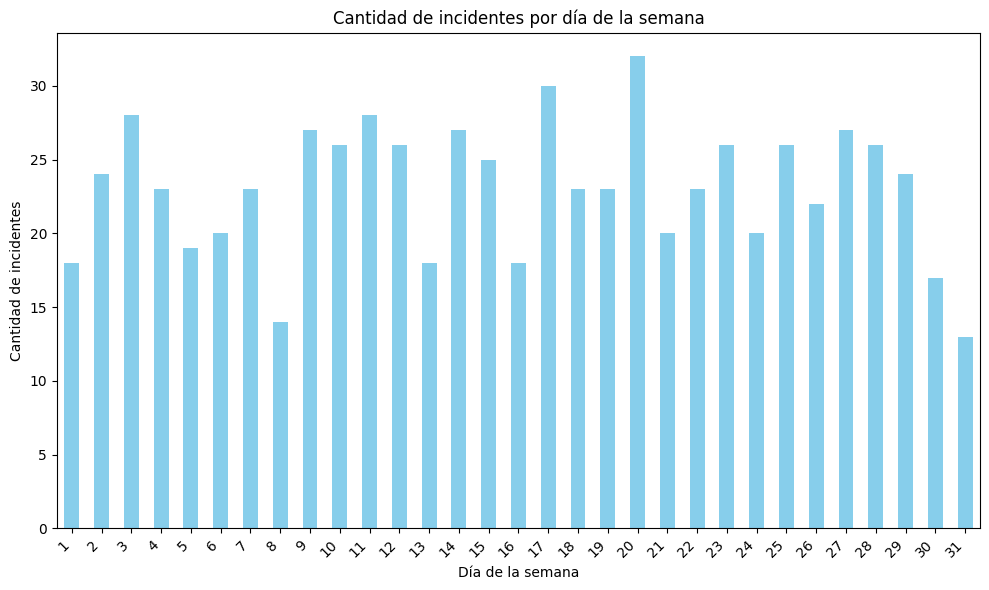

Índice del día con más accidentes: 20


In [8]:
# Calcular la cantidad de incidentes por día de la semana
incidentes_por_dia = homicidios['DIA'].value_counts().sort_index()

# Obtener el nombre del día de la semana para cada número de día
nombres_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Graficar la cantidad de incidentes por día de la semana
plt.figure(figsize=(10, 6))
incidentes_por_dia.plot(kind='bar', color='skyblue')
plt.title('Cantidad de incidentes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de incidentes')
plt.xticks(rotation=45, ha='right')  # Eliminamos la resta de 1 aquí
plt.tight_layout()
plt.show()

# Identificar el día de la semana con la mayor cantidad de incidentes
print("Índice del día con más accidentes:", incidentes_por_dia.idxmax())

Como podemos observar todos los dias huieron accidentes, por lo que podemos avanzar a ver en que horarios ocurrieron

HORARIO DONDE HUBIERON ACCIDENTES

C:\Users\lautaro\AppData\Local\Temp\ipykernel_6232\3226514003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HORA_ENTERA'] = df['HORA_ENTERA'].astype(int)


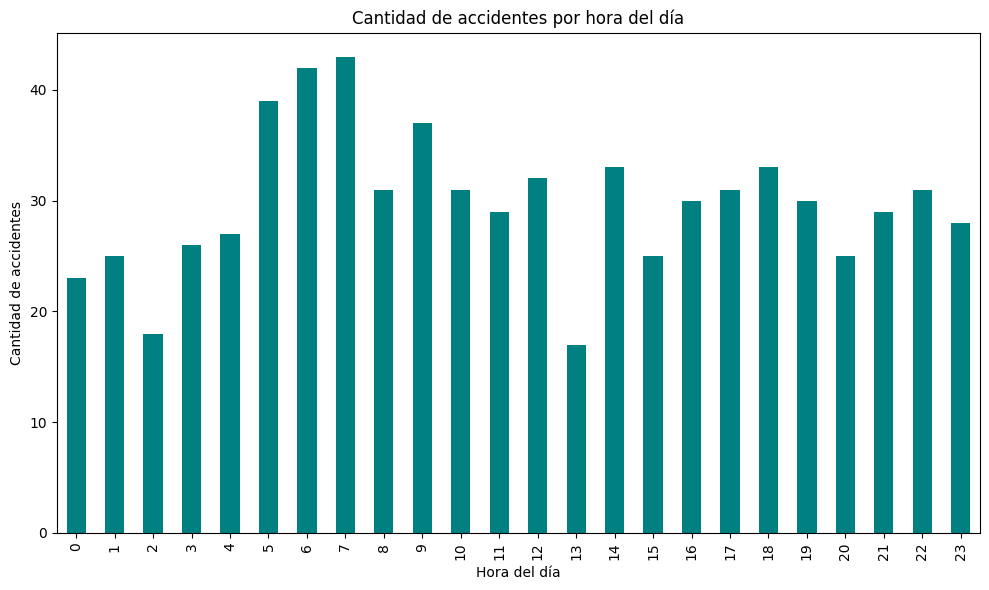

La hora del día con la mayor cantidad de accidentes es 7:00 con 43 incidentes.


In [9]:
# Filtrar los valores no válidos en la columna "HORA_ENTERA"
df = homicidios[homicidios['HORA_ENTERA'].str.isnumeric()]

# Convertir la columna "HORA_ENTERA" a tipo entero
df['HORA_ENTERA'] = df['HORA_ENTERA'].astype(int)

# Contar la cantidad de incidentes para cada hora del día
incidentes_por_hora = df['HORA_ENTERA'].value_counts().sort_index()

# Graficar la cantidad de incidentes por hora del día
plt.figure(figsize=(10, 6))
incidentes_por_hora.plot(kind='bar', color='teal')
plt.title('Cantidad de accidentes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de accidentes')
plt.xticks(range(24))  # Establecer los ticks del eje x de 0 a 23
plt.tight_layout()
plt.show()

# Identificar la hora del día con la mayor cantidad de accidentes
hora_mas_accidentes = incidentes_por_hora.idxmax()
cantidad_maxima_hora = incidentes_por_hora.max()
print(f"La hora del día con la mayor cantidad de accidentes es {hora_mas_accidentes}:00 con {cantidad_maxima_hora} incidentes.")


Podemos ver que sucede en las 5am a 7am la mayor cantidad de accidentes. Podemos decir que es un horario muy recurrido ya que mucha comienza su jornada

VAMOS A VER QUE TIPO DE VICTIMAS Y ACUSADOS FUERON LOS QUE MAS ACCIDENTES REGISTRARON

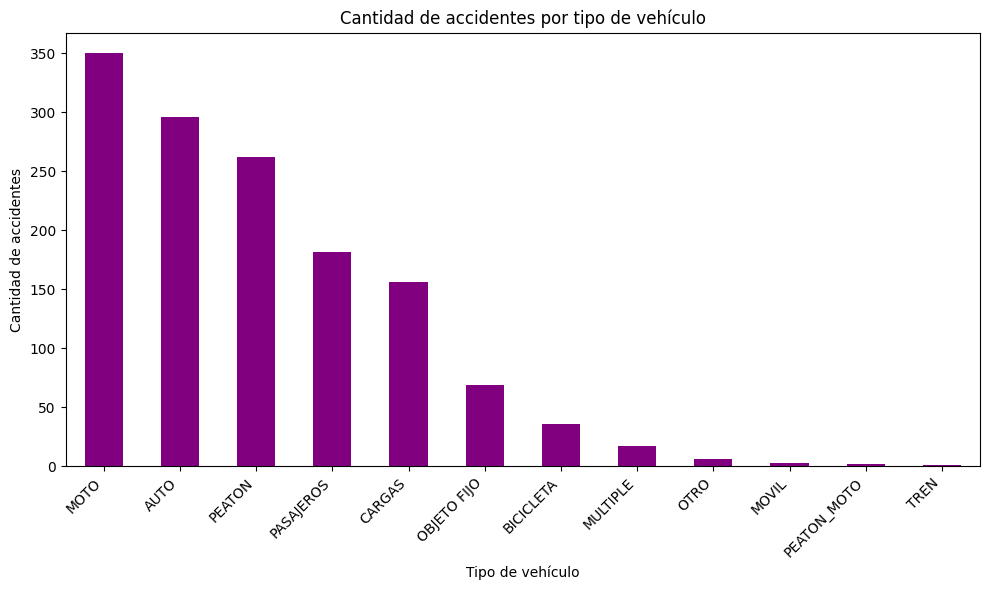

El vehículo con la mayor cantidad de accidentes es MOTO con 350.0 incidentes.


In [27]:
## Filtrar los datos para eliminar las filas con el valor "SD" en las columnas 'VICTIMA' y 'ACUSADO'
homicidios_filtrados = homicidios[(homicidios['VICTIMA'] != 'SD') & (homicidios['ACUSADO'] != 'SD')]

# Contar la cantidad de incidentes para cada tipo de vehículo como víctima
incidentes_por_victima = homicidios_filtrados['VICTIMA'].value_counts()

# Contar la cantidad de incidentes para cada tipo de vehículo como acusado
incidentes_por_acusado = homicidios_filtrados['ACUSADO'].value_counts()

# Sumar los recuentos de incidentes para cada tipo de vehículo
total_incidentes_por_vehiculo = incidentes_por_victima.add(incidentes_por_acusado, fill_value=0)

# Ordenar los resultados de mayor a menor cantidad de incidentes
total_incidentes_por_vehiculo = total_incidentes_por_vehiculo.sort_values(ascending=False)

# Graficar la cantidad de incidentes por tipo de vehículo
plt.figure(figsize=(10, 6))
total_incidentes_por_vehiculo.plot(kind='bar', color='purple')
plt.title('Cantidad de accidentes por tipo de vehículo')
plt.xlabel('Tipo de vehículo')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identificar el tipo de vehículo con la mayor cantidad de accidentes
vehiculo_mas_accidentes = total_incidentes_por_vehiculo.idxmax()
cantidad_maxima_vehiculo = total_incidentes_por_vehiculo.max()
print(f"El vehículo con la mayor cantidad de accidentes es {vehiculo_mas_accidentes} con {cantidad_maxima_vehiculo} incidentes.")



Existe un mayor de accidentes con 350 en motos. Y es lo mas razonable ya que la moto no te brinda una mayor seguridad. Mientras que lo mas bajo es el tren. Tambien es lo logico debido a que se dirigen sobre un mismo carril

EDAD EN DE LAS VICTIMAS

C:\Users\lautaro\AppData\Local\Temp\ipykernel_6232\1796588875.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDAD'] = df['EDAD'].astype(int)


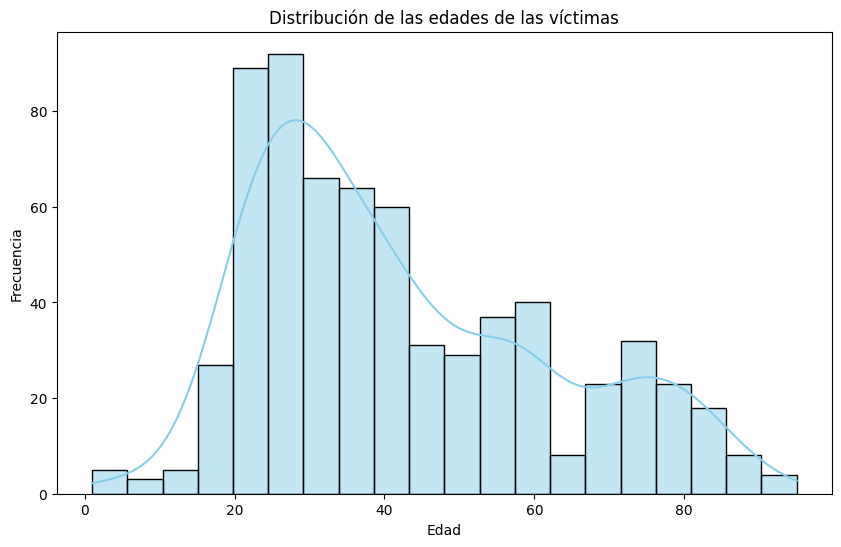

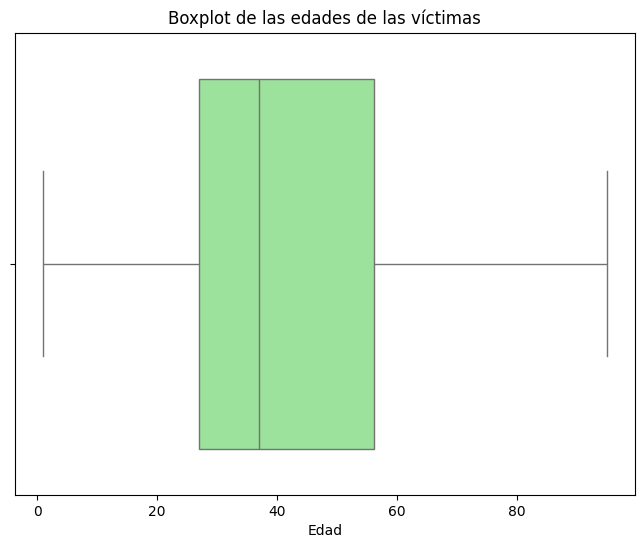

In [32]:
import seaborn as sns

def distribucion_edad(df):
    # Eliminar las edades 'SD'
    df = df[df['EDAD'] != 'SD']
    # Convertir las edades a tipo numérico
    df['EDAD'] = df['EDAD'].astype(int)

    # Graficar el histograma de edades
    plt.figure(figsize=(10, 6))
    sns.histplot(df['EDAD'], bins=20, kde=True, color='skyblue')
    plt.title('Distribución de las edades de las víctimas')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.show()

    # Graficar el boxplot de edades
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['EDAD'], color='lightgreen')
    plt.title('Boxplot de las edades de las víctimas')
    plt.xlabel('Edad')
    plt.show()

# Llamar a la función con el DataFrame de homicidios
distribucion_edad(homicidios)


Podemos ver que entre los 20 años y los 40 años son los que mas accidentes tuvieron frecuentemente y luego deciende. Por otro lado podemos obervar la mediana, los cuartiles y los valores atípicos de las edades

C:\Users\lautaro\AppData\Local\Temp\ipykernel_6232\201129905.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDAD'] = df['EDAD'].astype(int)


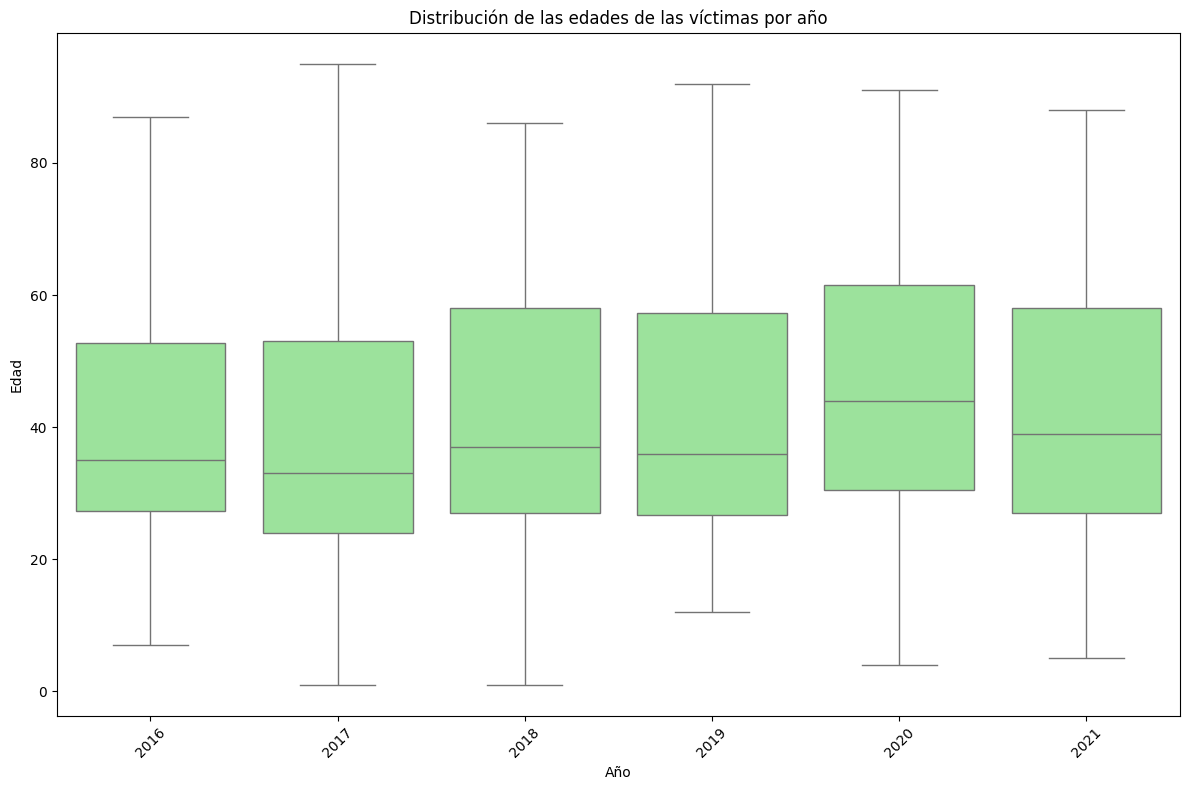

In [33]:
def distribucion_edad_por_año(df):
    # Eliminar las edades 'SD'
    df = df[df['EDAD'] != 'SD']
    # Convertir las edades a tipo numérico
    df['EDAD'] = df['EDAD'].astype(int)

    # Graficar el boxplot de edades por año
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='AÑO', y='EDAD', data=df, color='lightgreen')
    plt.title('Distribución de las edades de las víctimas por año')
    plt.xlabel('Año')
    plt.ylabel('Edad')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Llamar a la función con el DataFrame de homicidios
distribucion_edad_por_año(homicidios)


Hacemos un gráfico de caja para cada año, donde el "eje x" representa el año y el "eje y" representa la edad de las víctimas. Podremos observar la distribución de las edades en cada año y compararlas entre sí para identificar cualquier tendencia o cambio a lo largo del tiempo. Podemos decir que las edades se comportan muy parecido en los años registrados, con una mediana alrededor de los 40 años